In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()
pwd

'c:\\Users\\Piotr\\Desktop\\Analiza wielowymiarowa zaliczenie\\Do wysłania'

# 1. Analiza wstępna

### Wczytanie i motyfikacja danych

In [3]:
data = pd.read_excel(pwd + '/data.xlsx')
data

,Województwo,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,Dolnośląskie,1.861867,0.662586,4.369617,2.897226,6.449861,5.418021,6.936,1.728935,2.346659,2.146503,1.113662,2.994874,0.804510,5.589534,1.195761,0.820433
1,Kujawsko-Pomorskie,2.799397,0.852447,3.395417,2.246298,3.816189,2.861646,5.651,2.547430,2.279801,1.903138,0.703269,2.346576,0.529036,1.656325,0.766707,1.364213
2,Lubelskie,3.005153,0.672129,4.467941,1.573469,3.851250,2.444685,6.564,1.408037,2.600207,1.731836,0.580435,2.345387,0.230382,3.355739,0.483246,1.007458
3,Lubuskie,1.595658,0.517511,2.712365,2.501707,5.063486,3.368893,4.951,1.227819,1.725035,2.303430,0.555461,4.938389,0.146785,6.965084,0.856429,1.319246
4,Łódzkie,2.271325,0.906075,5.015562,1.930691,9.223590,3.075226,6.223,1.006286,1.962466,1.774570,0.607362,2.141917,2.240502,3.471895,0.629659,0.768744
5,Małopolskie,1.876736,0.775427,4.150864,2.188714,6.489096,4.081775,9.273,1.203952,3.119197,2.084323,0.669549,2.855130,0.466232,5.227716,0.673688,0.765632
6,Mazowieckie,2.113629,0.732841,5.073471,2.329744,5.253235,5.413407,9.144,1.046656,2.539547,1.554566,0.971830,2.338399,0.937534,2.370123,0.618924,0.739190
7,Opolskie,2.163648,0.548186,2.812616,1.728051,4.617414,1.869104,5.015,1.602390,2.108408,2.519548,0.549346,2.668584,1.651276,2.555391,0.966705,0.866029
8,Podkarpackie,3.310079,1.078655,3.170765,1.290023,5.091249,2.180320,5.815,1.030714,2.876412,3.092143,0.664068,3.832214,0.104810,2.674584,0.531177,0.873135
9,Podlaskie,2.714761,0.766070,4.848005,1.986994,2.898879,3.460373,6.085,0.887945,2.263389,1.436381,0.624956,3.124722,0.095237,1.341493,0.634619,1.336705


In [4]:
data.columns

Index(['Województwo', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16'],
      dtype='object')

In [5]:
data = data.set_index('Województwo')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
Województwo,,,,,,,,,,,,,,,,
Dolnośląskie,1.861867,0.662586,4.369617,2.897226,6.449861,5.418021,6.936,1.728935,2.346659,2.146503,1.113662,2.994874,0.804510,5.589534,1.195761,0.820433
Kujawsko-Pomorskie,2.799397,0.852447,3.395417,2.246298,3.816189,2.861646,5.651,2.547430,2.279801,1.903138,0.703269,2.346576,0.529036,1.656325,0.766707,1.364213
Lubelskie,3.005153,0.672129,4.467941,1.573469,3.851250,2.444685,6.564,1.408037,2.600207,1.731836,0.580435,2.345387,0.230382,3.355739,0.483246,1.007458
Lubuskie,1.595658,0.517511,2.712365,2.501707,5.063486,3.368893,4.951,1.227819,1.725035,2.303430,0.555461,4.938389,0.146785,6.965084,0.856429,1.319246
Łódzkie,2.271325,0.906075,5.015562,1.930691,9.223590,3.075226,6.223,1.006286,1.962466,1.774570,0.607362,2.141917,2.240502,3.471895,0.629659,0.768744
Małopolskie,1.876736,0.775427,4.150864,2.188714,6.489096,4.081775,9.273,1.203952,3.119197,2.084323,0.669549,2.855130,0.466232,5.227716,0.673688,0.765632
Mazowieckie,2.113629,0.732841,5.073471,2.329744,5.253235,5.413407,9.144,1.046656,2.539547,1.554566,0.971830,2.338399,0.937534,2.370123,0.618924,0.739190
Opolskie,2.163648,0.548186,2.812616,1.728051,4.617414,1.869104,5.015,1.602390,2.108408,2.519548,0.549346,2.668584,1.651276,2.555391,0.966705,0.866029
Podkarpackie,3.310079,1.078655,3.170765,1.290023,5.091249,2.180320,5.815,1.030714,2.876412,3.092143,0.664068,3.832214,0.104810,2.674584,0.531177,0.873135


## Opis i filtrowanie danych

### Obliczenie współczyników zmienności, Giniego oraz skośności

#### Zdefiniowane funkcji do obliczania współczynników zmienności, Giniego oraz skośności

In [6]:
def cv(col):
    means = col.mean()
    stds = col.std()
    return (stds / means) * 100
   
def gini(col):
    col = sorted(col)
    n = len(col)
    numerator = sum((i+1) * val for i, val in enumerate(col))
    denominator = sum(col)
    return (2 * numerator / (n * denominator)) - (n + 1) / n

def skewness(col):
    return pd.Series(col).skew()

#### Zdefiniowane funkcji do opisu danych zawierającego współczynnik zmienności, Giniego oraz skośności

In [7]:
def describe_v2(dataframe):
    cv_values = dataframe.apply(cv)
    gini_values = dataframe.apply(gini)
    skewness_values = dataframe.apply(skewness)
    
    described_data = dataframe.describe()
    
    indicators = pd.DataFrame([cv_values, gini_values, skewness_values], index=['CV', 'Gini', 'Skewness'])
    described_data_v2 = pd.concat([described_data, indicators])
    return described_data_v2

#### Opis danych:

In [8]:
described_data = describe_v2(data)
described_data.round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,2.29,0.69,3.90,2.16,5.47,3.49,6.39,1.37,2.52,2.05,0.72,3.04,0.75,3.69,0.84,0.99
std,0.61,0.27,0.77,0.52,1.49,1.43,1.32,0.41,0.59,0.47,0.17,0.71,0.80,2.09,0.30,0.27
min,1.32,0.24,2.71,1.29,2.90,1.12,4.95,0.89,1.73,1.44,0.55,2.14,0.07,1.34,0.48,0.64
25%,1.85,0.51,3.34,1.92,4.60,2.38,5.58,1.15,2.22,1.71,0.60,2.52,0.21,2.35,0.63,0.77
50%,2.22,0.67,4.05,2.09,5.30,3.41,6.14,1.25,2.42,1.99,0.67,2.93,0.41,2.94,0.72,0.92
75%,2.82,0.79,4.39,2.33,6.46,4.23,6.66,1.46,2.71,2.37,0.76,3.31,1.02,5.32,1.03,1.11
max,3.31,1.32,5.07,3.50,9.22,6.31,9.27,2.55,4.16,3.09,1.11,4.94,2.64,8.37,1.44,1.54
CV,26.57,39.55,19.74,23.99,27.22,40.89,20.65,30.02,23.28,22.71,23.15,23.49,106.09,56.53,36.16,27.23
Gini,0.15,0.21,0.11,0.12,0.14,0.22,0.11,0.15,0.12,0.12,0.12,0.12,0.53,0.30,0.19,0.15


#### Odrzucenie zmiennych o współczynniku Giniego, zmienności oraz skośności spoza ustalonych przedziałów Gini: (0.1, 1) Skośność: (-2, 2; poprawić na -2, 2) Zmienność: (10, 100)

Wsp. zmienności

In [9]:
cv = described_data.loc['CV']
filtered_cv = cv[(cv <=10)].index.tolist()
filtered_cv

[]

Skośność

In [10]:
skew = described_data.loc['Skewness']
filtered_skew = skew[(skew < -2) | (skew > 2)].index.tolist()
filtered_skew

[]

Wsp. Giniego

In [11]:
g = described_data.loc['Gini']
filtered_g = g[(g >= 0) & (g <= 0.1)].index.tolist()
filtered_g

[]

In [12]:
columns_to_drop = filtered_cv + filtered_skew + filtered_g
columns_to_drop = list(set(columns_to_drop))
(f'Zmienne do odrzucenia: {columns_to_drop}')

'Zmienne do odrzucenia: []'

In [13]:
data_original = data.copy()
data = data.drop(columns=columns_to_drop)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
Województwo,,,,,,,,,,,,,,,,
Dolnośląskie,1.861867,0.662586,4.369617,2.897226,6.449861,5.418021,6.936,1.728935,2.346659,2.146503,1.113662,2.994874,0.804510,5.589534,1.195761,0.820433
Kujawsko-Pomorskie,2.799397,0.852447,3.395417,2.246298,3.816189,2.861646,5.651,2.547430,2.279801,1.903138,0.703269,2.346576,0.529036,1.656325,0.766707,1.364213
Lubelskie,3.005153,0.672129,4.467941,1.573469,3.851250,2.444685,6.564,1.408037,2.600207,1.731836,0.580435,2.345387,0.230382,3.355739,0.483246,1.007458
Lubuskie,1.595658,0.517511,2.712365,2.501707,5.063486,3.368893,4.951,1.227819,1.725035,2.303430,0.555461,4.938389,0.146785,6.965084,0.856429,1.319246
Łódzkie,2.271325,0.906075,5.015562,1.930691,9.223590,3.075226,6.223,1.006286,1.962466,1.774570,0.607362,2.141917,2.240502,3.471895,0.629659,0.768744
Małopolskie,1.876736,0.775427,4.150864,2.188714,6.489096,4.081775,9.273,1.203952,3.119197,2.084323,0.669549,2.855130,0.466232,5.227716,0.673688,0.765632
Mazowieckie,2.113629,0.732841,5.073471,2.329744,5.253235,5.413407,9.144,1.046656,2.539547,1.554566,0.971830,2.338399,0.937534,2.370123,0.618924,0.739190
Opolskie,2.163648,0.548186,2.812616,1.728051,4.617414,1.869104,5.015,1.602390,2.108408,2.519548,0.549346,2.668584,1.651276,2.555391,0.966705,0.866029
Podkarpackie,3.310079,1.078655,3.170765,1.290023,5.091249,2.180320,5.815,1.030714,2.876412,3.092143,0.664068,3.832214,0.104810,2.674584,0.531177,0.873135


In [14]:
data_names = {
"X1": "Liczba bezrobotnych na 100 ludności",
"X2": "Liczba przychodni na 10 tyś ludności",
"X3": "Liczba lekarzy przypadająca na 1 osobę w tysiącach",
"X4": "Liczba przestępstw w ludności (w setkach)",
"X5": "Liczba wypadków na 10 tyś ludności",
"X6": "Mieszkania oddane do użytkowania na 1 tyś ludności",
"X7": "Mediana cen mieszkan w tysiącach",
"X8": "Liczba imprez przypadających na 10 tyś mieszkańców",
"X9": "Liczba muzeów przypadająca na 100 tyś mieszkańców",
"X10": "Liczba obiektów sporotwych na 10 tys mieszkańców",
"X11": "Liczba miejsc na widowni w kinach przypadająca na 100 mieszkańców",
"X12": "Powierzchnia lasów przypadająca na 10 km^2 powierzchni",
"X13": "Emisja zanieczyszczeń gazowych na 1 tys km^2 ( w tysiącach)",
"X14": "Długość lini komunikacji miejskiej na 10 tys mieszkańców",
"X15": "Osoby bezdomne w noclegowiskach na 1 tyś ludności",
"X16": "Rodziny, którym przyznano świadczenia z powodu ubóstwa na 100 ludności",
}

df_data_names = pd.DataFrame(list(data_names.values()), index=data_names.keys(), columns=['Cecha'])

## Wizualizacje

#### Wariancje zmiennych

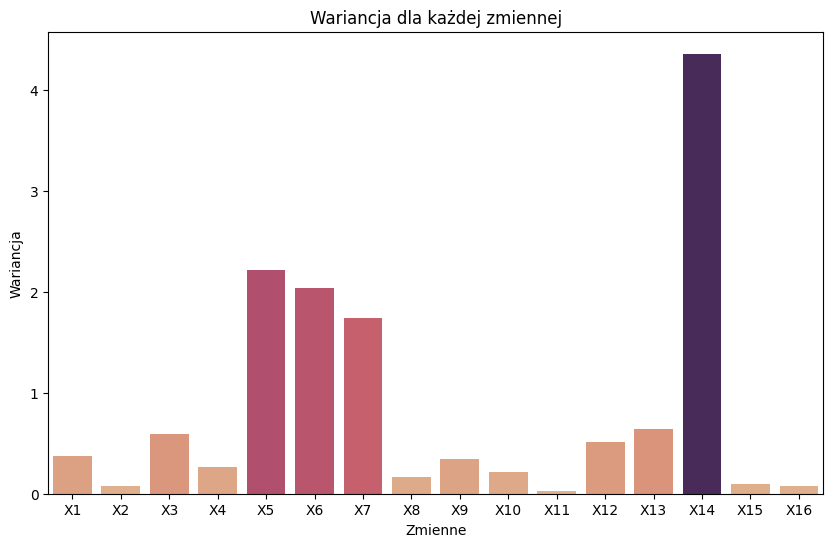

In [15]:
var = data.var()

var_df = var.reset_index()
var_df.columns = ['Zmienna', 'Wariancja']


plt.figure(figsize=(10, 6))
sns.barplot(x='Zmienna', y='Wariancja', data=var_df, hue='Wariancja', palette='flare', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Wariancja dla każdej zmiennej')
plt.xlabel('Zmienne')
plt.ylabel('Wariancja')
plt.show()

#### Ustalenie liczby wierszy i kolumn dla subplotów

In [16]:
liczba_cech = len(data.columns)
liczba_kolumn = 2
liczba_wierszy =  liczba_cech // liczba_kolumn + (liczba_cech % liczba_kolumn > 0)

### Wykresy słupkowe

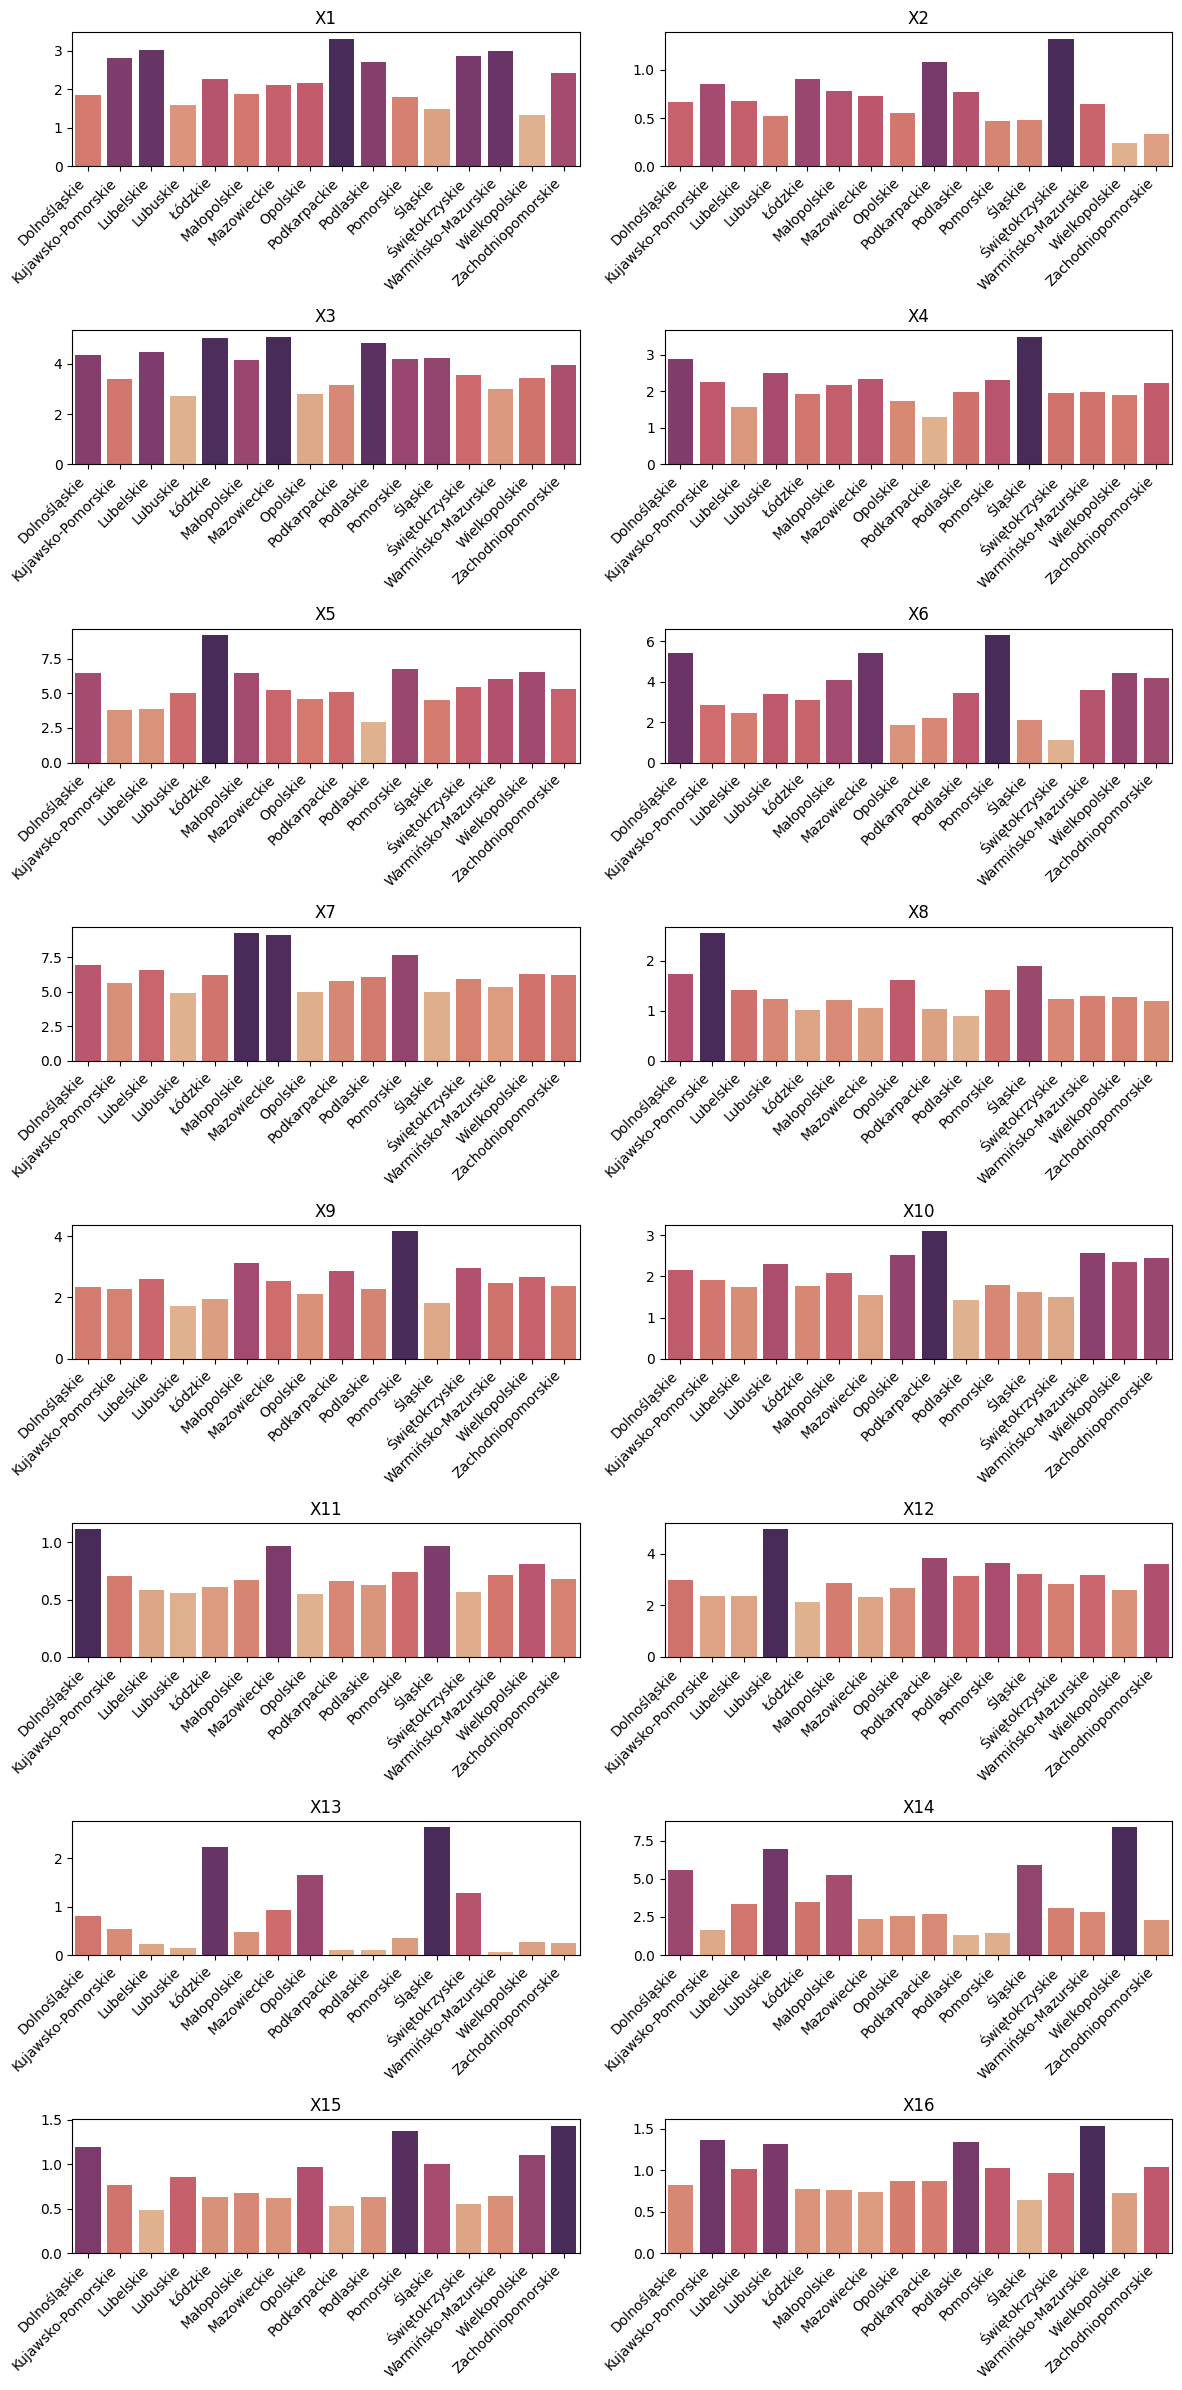

In [17]:
plt.figure(figsize=(12, 3 * liczba_wierszy))
for i, cecha in enumerate(data.columns, 1):
    plt.subplot(liczba_wierszy, liczba_kolumn, i)
    palette = sns.color_palette("flare", as_cmap=True)
    sns.barplot(x=data.index, y=data[cecha], legend=False, hue=data[cecha], palette=palette)
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=45, ha='right')
    plt.title(cecha)

plt.tight_layout()
plt.show()

### Histogramy

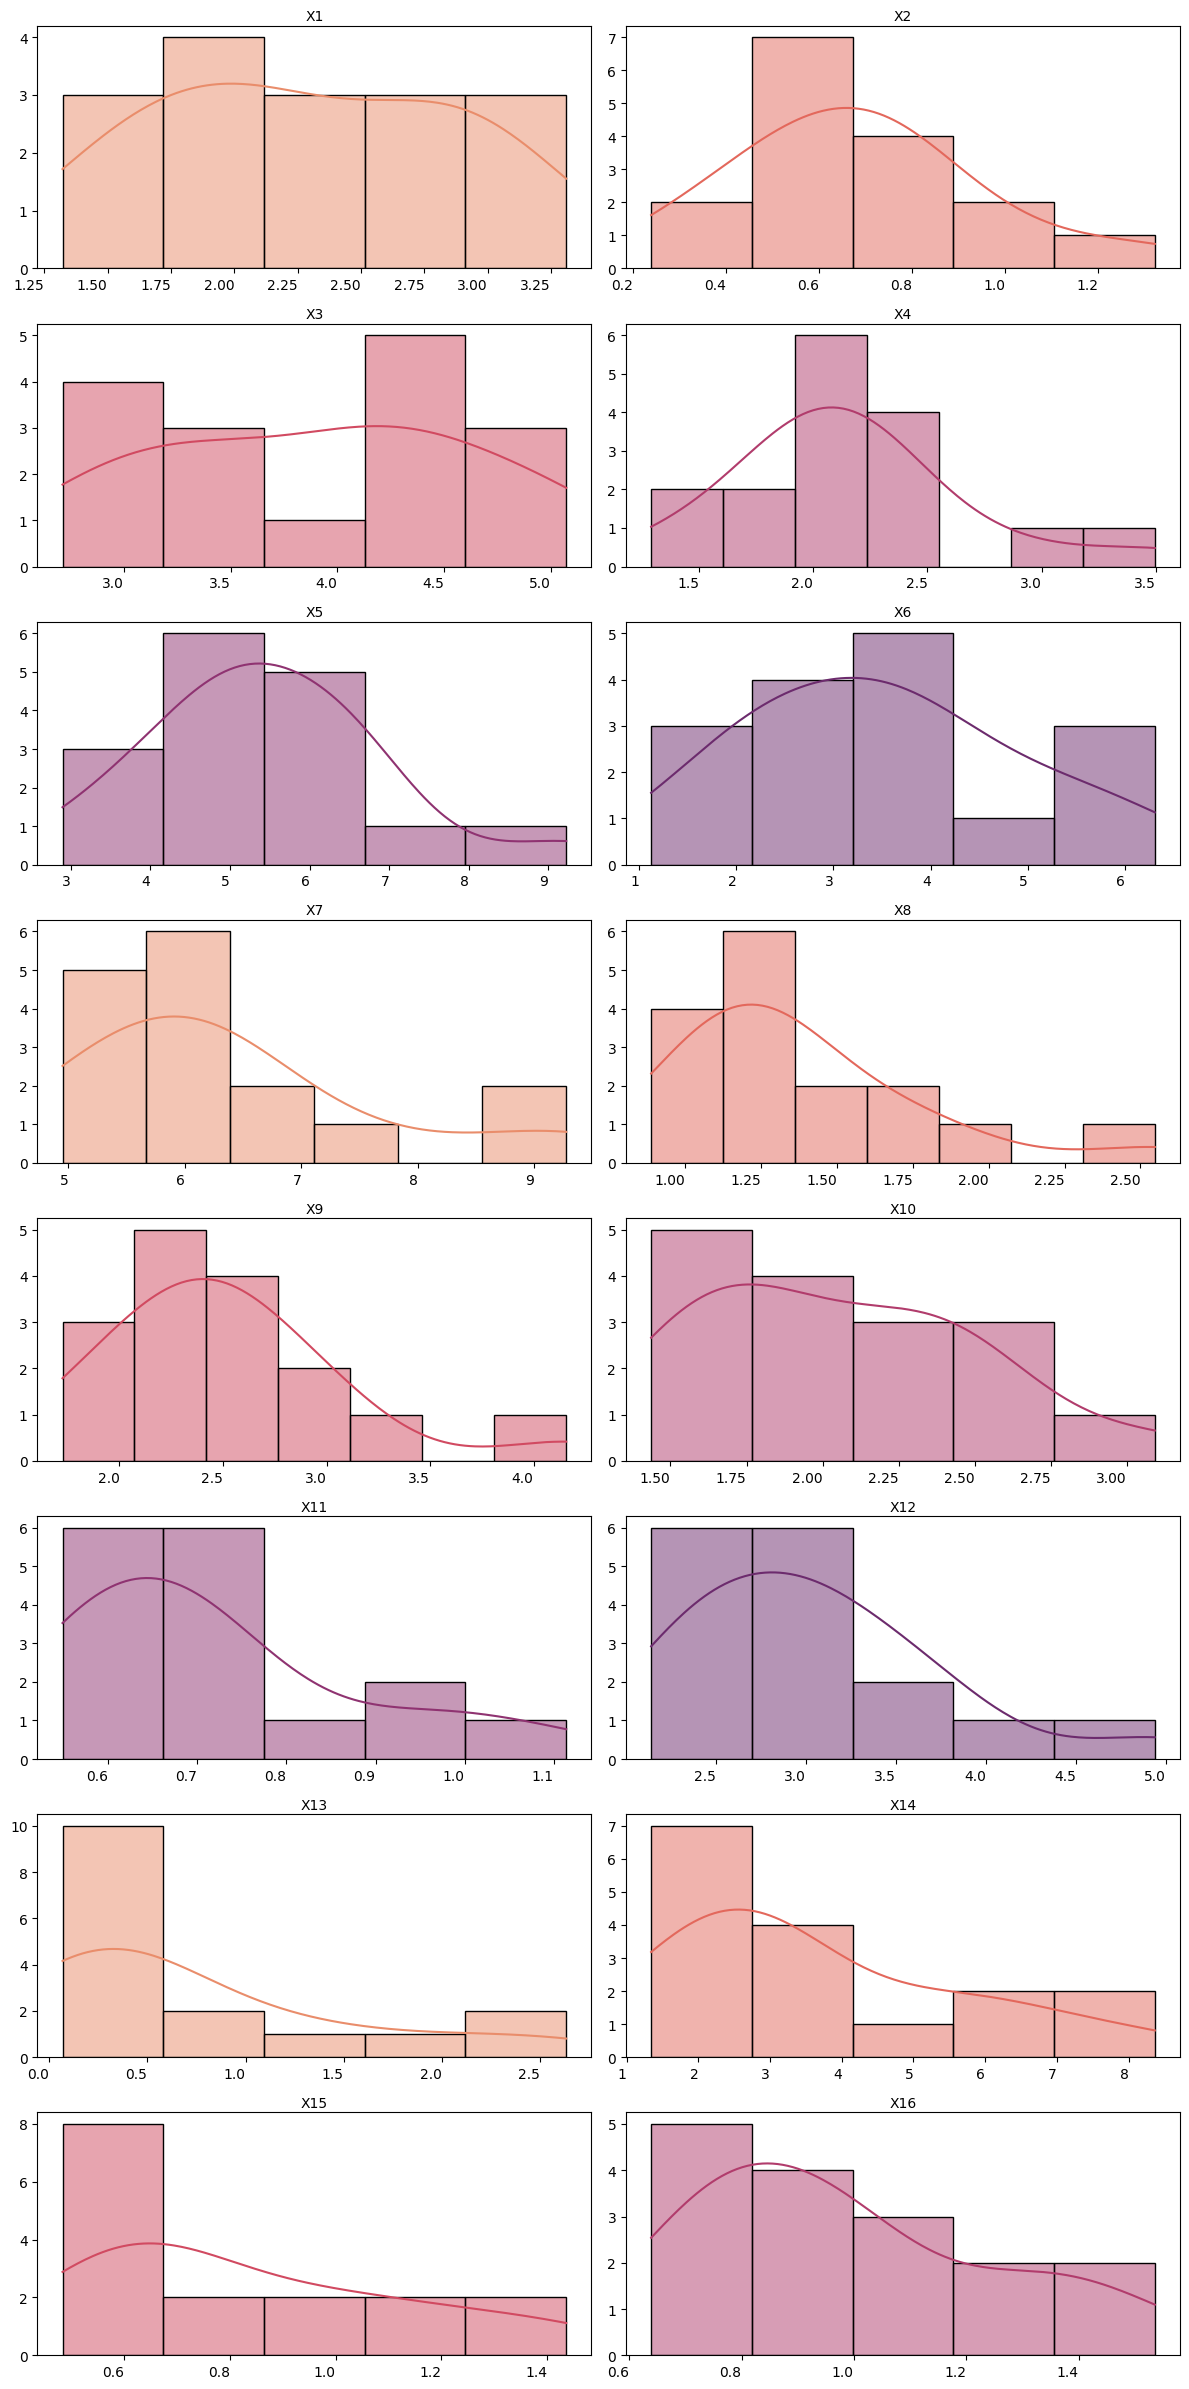

In [18]:
plt.figure(figsize=(12, 3 * liczba_wierszy))
for i, cecha in enumerate(data.columns):
    ax = plt.subplot(liczba_wierszy, liczba_kolumn, i + 1)
    color = sns.color_palette("flare")[i % len(sns.color_palette("flare"))]
    sns.histplot(data=data, x=cecha, kde=True, color=color)
    plt.xlabel(cecha)
    plt.ylabel('')
    plt.xticks(ha='right')
    
    ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.show()

### Wykresy pudełkowe

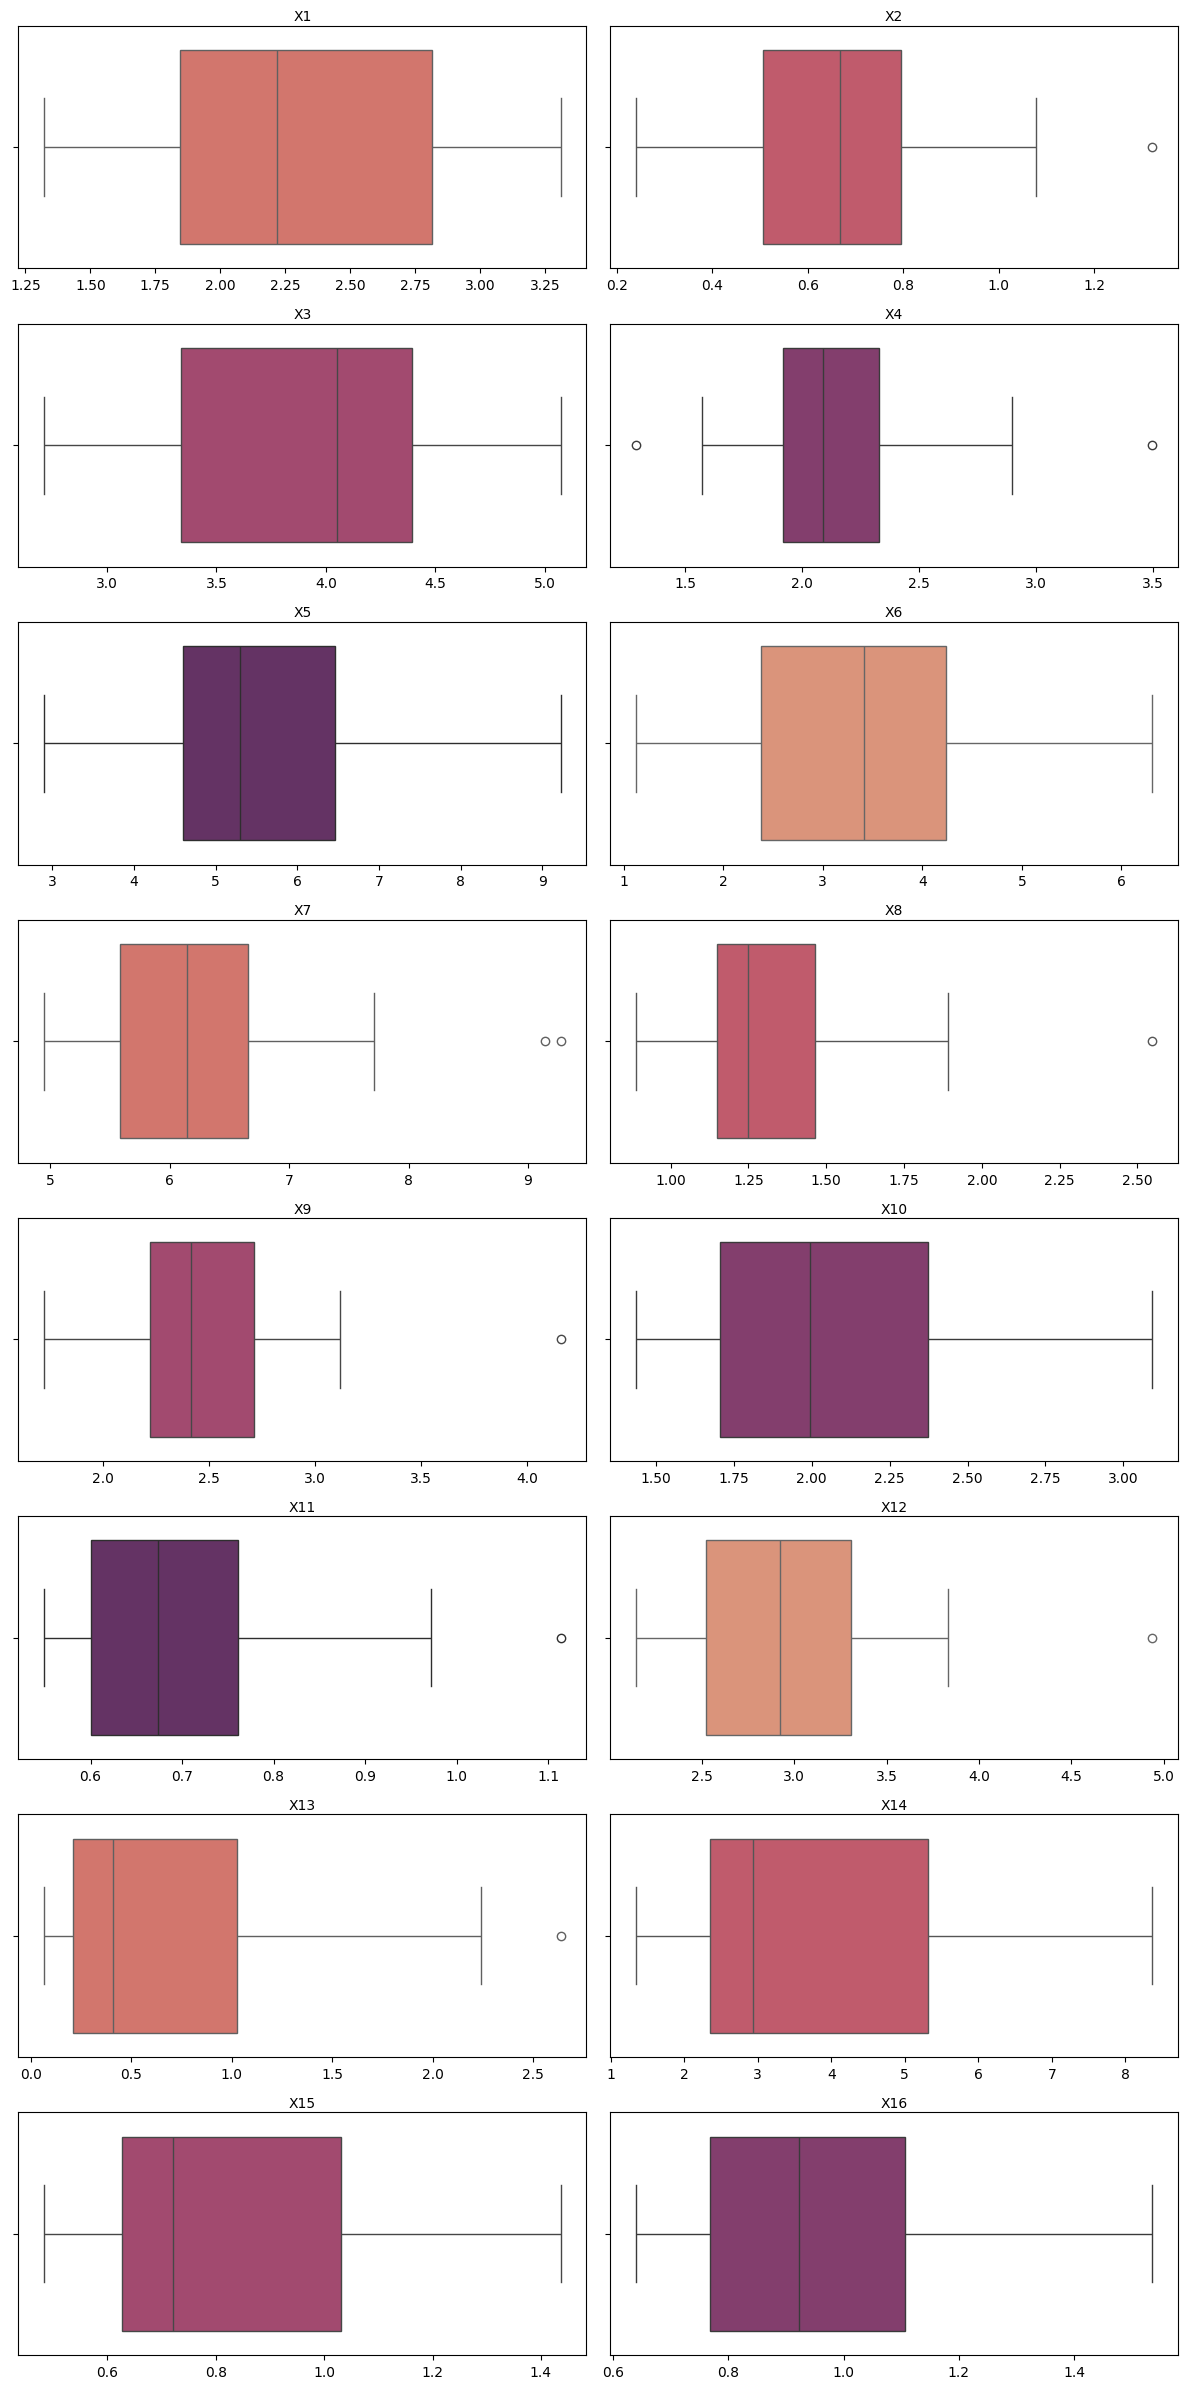

In [19]:
plt.figure(figsize=(12, 3 * liczba_wierszy))
for i, cecha in enumerate(data.columns, 1):
    ax = plt.subplot(liczba_wierszy, liczba_kolumn, i)
    color = sns.color_palette("flare")[i % len(sns.color_palette("flare"))]
    sns.boxplot(data[cecha], orient='h', color=color)
    ax.xaxis.set_label_position('top')
plt.tight_layout() 
plt.show()

### Macierz korelacji

In [20]:
corr = (data.corr().round(2))
corr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
X1,1.00,0.65,-0.08,-0.63,-0.33,-0.45,-0.18,-0.10,0.08,0.14,-0.43,-0.15,-0.30,-0.68,-0.59,0.46
X2,0.65,1.00,0.07,-0.34,-0.01,-0.49,0.05,-0.12,0.11,-0.18,-0.27,-0.20,0.12,-0.39,-0.72,0.06
X3,-0.08,0.07,1.00,0.22,0.17,0.37,0.58,-0.25,0.09,-0.69,0.37,-0.47,0.26,-0.21,-0.08,-0.38
X4,-0.63,-0.34,0.22,1.00,0.02,0.28,0.01,0.42,-0.26,-0.37,0.66,0.18,0.43,0.35,0.46,-0.18
X5,-0.33,-0.01,0.17,0.02,1.00,0.35,0.28,-0.27,0.21,0.12,0.13,-0.13,0.27,0.27,0.19,-0.38
X6,-0.45,-0.49,0.37,0.28,0.35,1.00,0.64,-0.12,0.42,-0.06,0.54,0.08,-0.35,0.05,0.53,-0.06
X7,-0.18,0.05,0.58,0.01,0.28,0.64,1.00,-0.27,0.56,-0.29,0.33,-0.30,-0.18,-0.09,-0.03,-0.38
X8,-0.10,-0.12,-0.25,0.42,-0.27,-0.12,-0.27,1.00,-0.15,-0.06,0.27,-0.19,0.22,0.02,0.25,0.11
X9,0.08,0.11,0.09,-0.26,0.21,0.42,0.56,-0.15,1.00,-0.03,-0.01,0.01,-0.37,-0.29,0.15,-0.08
X10,0.14,-0.18,-0.69,-0.37,0.12,-0.06,-0.29,-0.06,-0.03,1.00,-0.13,0.40,-0.35,0.17,0.16,0.08


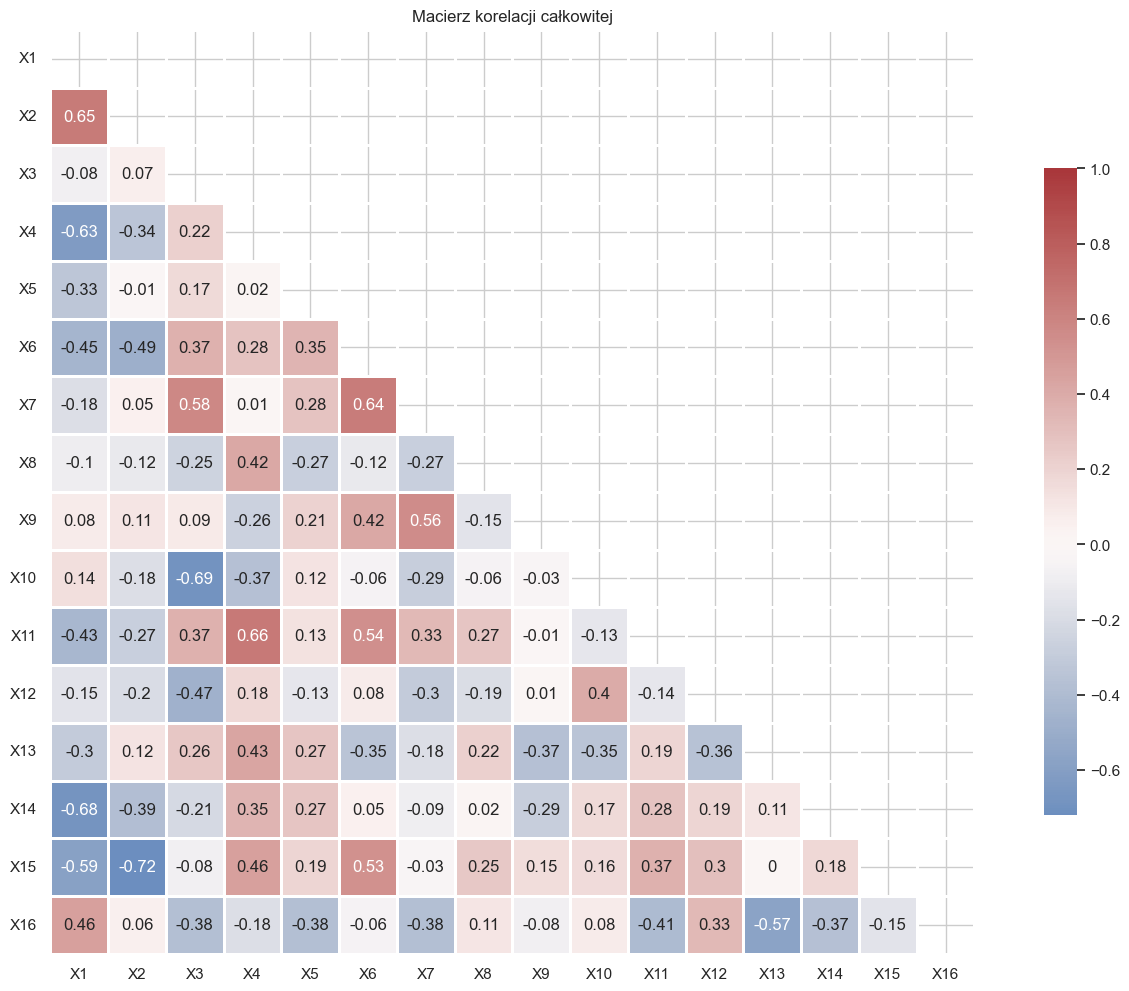

In [21]:
sns.set(style="whitegrid")
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(18, 12))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .7}, annot=True)
plt.yticks(rotation=0)
plt.title('Macierz korelacji całkowitej')
plt.show()

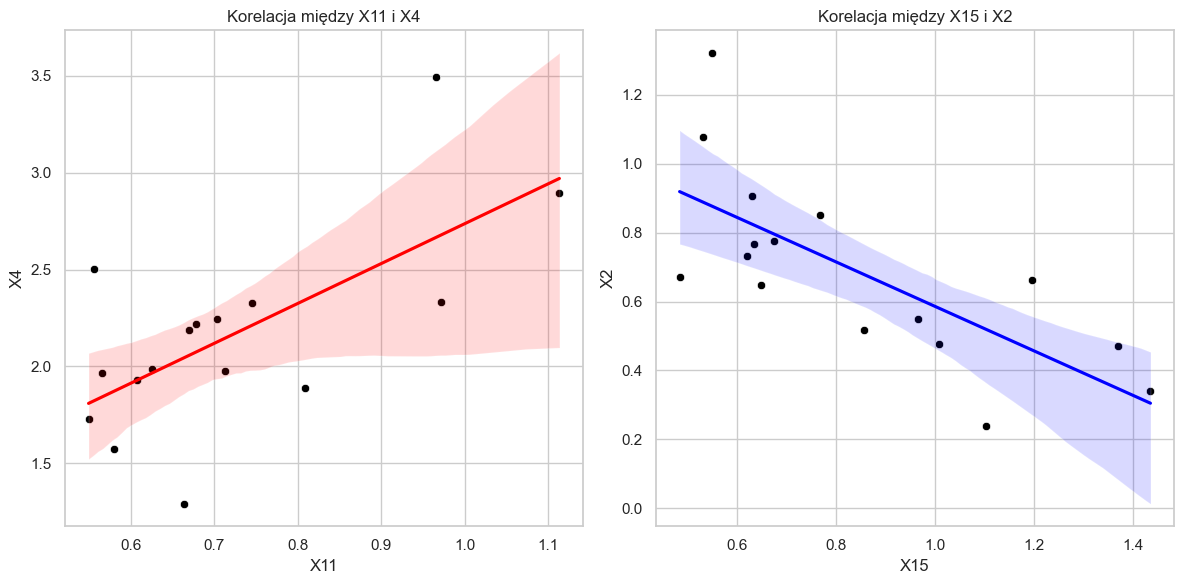

In [22]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x="X11", y="X4", data=data, color="black")
sns.regplot(x="X11", y="X4", data=data, scatter=False, color="red")
plt.title("Korelacja między X11 i X4")


ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x="X15", y="X2", data=data, color="black")
sns.regplot(x="X15", y="X2", data=data, scatter=False, color="blue")
plt.title("Korelacja między X15 i X2")

plt.tight_layout()
plt.show()

In [23]:
import pingouin as pg

# 2. PCA

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
corr = data.corr()

In [26]:
mask = (corr.abs() > 0.65) & (corr != 1.0)
pca_variables = corr.columns[mask.any()].tolist()
len(pca_variables)

8

In [27]:
data_pca = data[pca_variables]
data_pca

,X1,X2,X3,X4,X10,X11,X14,X15
Województwo,,,,,,,,
Dolnośląskie,1.861867,0.662586,4.369617,2.897226,2.146503,1.113662,5.589534,1.195761
Kujawsko-Pomorskie,2.799397,0.852447,3.395417,2.246298,1.903138,0.703269,1.656325,0.766707
Lubelskie,3.005153,0.672129,4.467941,1.573469,1.731836,0.580435,3.355739,0.483246
Lubuskie,1.595658,0.517511,2.712365,2.501707,2.303430,0.555461,6.965084,0.856429
Łódzkie,2.271325,0.906075,5.015562,1.930691,1.774570,0.607362,3.471895,0.629659
Małopolskie,1.876736,0.775427,4.150864,2.188714,2.084323,0.669549,5.227716,0.673688
Mazowieckie,2.113629,0.732841,5.073471,2.329744,1.554566,0.971830,2.370123,0.618924
Opolskie,2.163648,0.548186,2.812616,1.728051,2.519548,0.549346,2.555391,0.966705
Podkarpackie,3.310079,1.078655,3.170765,1.290023,3.092143,0.664068,2.674584,0.531177


In [28]:
data_pca_names = {
"X1": "Liczba bezrobotnych na 100 ludności",
"X2": "Liczba przychodni na 10 tyś ludności",
"X3": "Liczba lekarzy przypadająca na 1 osobę w tysiącach",
"X4": "Liczba przestępstw w ludności (w setkach)",
"X10": "Liczba obiektów sporotwych na 10 tys mieszkańców",
"X11": "Liczba miejsc na widowni w kinach przypadająca na 100 mieszkańców",
"X14": "Długość lini komunikacji miejskiej na 10 tys mieszkańców",
"X15": "Osoby bezdomne w noclegowiskach na 1 tyś ludności",
}

df_data_pca_names = pd.DataFrame(list(data_pca_names.values()), index=data_pca_names.keys(), columns=['Cecha'])
df_data_pca_names

,Cecha
X1,Liczba bezrobotnych na 100 ludności
X2,Liczba przychodni na 10 tyś ludności
X3,Liczba lekarzy przypadająca na 1 osobę w tysią...
X4,Liczba przestępstw w ludności (w setkach)
X10,Liczba obiektów sporotwych na 10 tys mieszkańców
X11,Liczba miejsc na widowni w kinach przypadająca...
X14,Długość lini komunikacji miejskiej na 10 tys m...
X15,Osoby bezdomne w noclegowiskach na 1 tyś ludności


In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)


pca = PCA(n_components=None)
transformed = pca.fit_transform(data_scaled)
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [30]:
a = pca.explained_variance_
b = pca.explained_variance_ratio_
c = np.cumsum(b)

index = [f"PC{i+1}" for i in range(len(a))]

df_eigenvalues = pd.DataFrame({'Wartości własne (wyjaśniona wariancja)': a, 
                   'Stosunek wyjaśnionej wariancji': b, 
                   'Suma wyjaśnionej wariancji': c}, 
                   index=index)
df_eigenvalues

,Wartości własne (wyjaśniona wariancja),Stosunek wyjaśnionej wariancji,Suma wyjaśnionej wariancji
PC1,3.614822,0.423612,0.423612
PC2,2.183292,0.255855,0.679466
PC3,0.998906,0.117059,0.796526
PC4,0.747858,0.087640,0.884165
PC5,0.528166,0.061894,0.946060
PC6,0.227727,0.026687,0.972747
PC7,0.124304,0.014567,0.987313
PC8,0.108258,0.012687,1.000000


### Wektory własne i ładunki

In [31]:
df_eigenvectors = pd.DataFrame(
    eigenvectors, 
    columns=data_pca.columns,
    index=df_eigenvalues.index)

df_eigenvectors

,X1,X2,X3,X4,X10,X11,X14,X15
PC1,-0.488565,-0.403246,0.073772,0.430891,-0.055932,0.368055,0.330351,0.399828
PC2,0.038458,0.244398,0.607659,0.232182,-0.613736,0.233429,-0.225707,-0.183106
PC3,0.201850,-0.337338,0.141331,-0.088962,0.077363,0.005542,-0.703265,0.563003
PC4,0.319991,0.328088,-0.118633,0.221902,0.435296,0.726928,-0.088347,-0.030624
PC5,-0.000153,0.303352,-0.573593,0.588212,-0.287615,-0.259061,-0.233646,0.168968
PC6,0.349784,-0.681150,-0.200554,0.250919,-0.131227,0.090618,-0.081114,-0.527723
PC7,0.347903,0.008310,0.458171,0.508232,0.395858,-0.443537,0.226177,0.078036
PC8,0.610985,-0.012920,-0.110035,-0.189782,-0.409982,0.097685,0.474564,0.419008


### Współrzędne przypadków (scores)

In [32]:
scores = pd.DataFrame(transformed, index=data.index, columns=df_eigenvalues.index)
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Województwo,,,,,,,,
Dolnośląskie,2.749130,0.684712,-0.107984,1.735734,-0.237735,-0.461713,0.092481,0.309314
Kujawsko-Pomorskie,-1.106016,0.268933,0.393570,0.481188,0.990321,0.307424,-0.244681,0.103455
Lubelskie,-1.838439,0.720401,-0.148088,-0.863638,-0.884459,0.690719,0.151654,0.499281
Lubuskie,1.159670,-1.966357,-1.376473,-0.889565,0.850590,0.196522,0.247094,-0.205742
Łódzkie,-0.952540,1.378433,-0.411298,-0.758182,-0.617700,-0.583109,0.439197,-0.277272
Małopolskie,0.161008,0.090584,-1.060384,-0.385599,-0.274695,-0.322431,0.240339,-0.419780
Mazowieckie,0.456400,2.395863,0.034057,0.586969,-0.717659,0.287250,-0.540917,-0.445080
Opolskie,-0.624959,-2.056440,0.716216,-0.538481,0.346018,-0.046049,-0.395782,-0.417910
Podkarpackie,-3.109916,-1.756120,-0.195215,1.604446,-0.645764,-0.379005,0.160440,-0.183094


### Sprawdzenie punktu łokcowiego (ang. elbow point) tj. miejsca, w którym nachylenie krzywej zaczyna się znacząco zmniejszać.

In [33]:
from kneed import KneeLocator

In [34]:
num_components = len(pca.explained_variance_ratio_)
explained_variance = (range(1, num_components + 1))
cumulative_sum = c

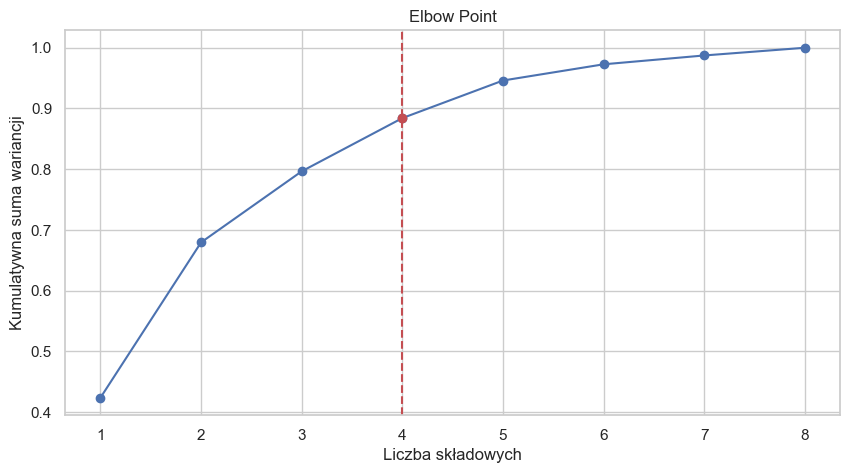

In [35]:
y = cumulative_sum
x = explained_variance

kn = KneeLocator(x, y, S=1, curve="concave", direction="increasing")


plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.plot(kn.knee, kn.knee_y, 'ro')  # elbowpoint
plt.axvline(x=kn.knee, color='r', linestyle='--')

plt.title('Elbow Point')
plt.xlabel('Liczba składowych')
plt.ylabel('Kumulatywna suma wariancji')
plt.show()

### Wykres osypiska

In [36]:
eigenvalues

array([3.61482172, 2.18329235, 0.99890614, 0.74785826, 0.52816555,
       0.22772724, 0.12430367, 0.10825841])

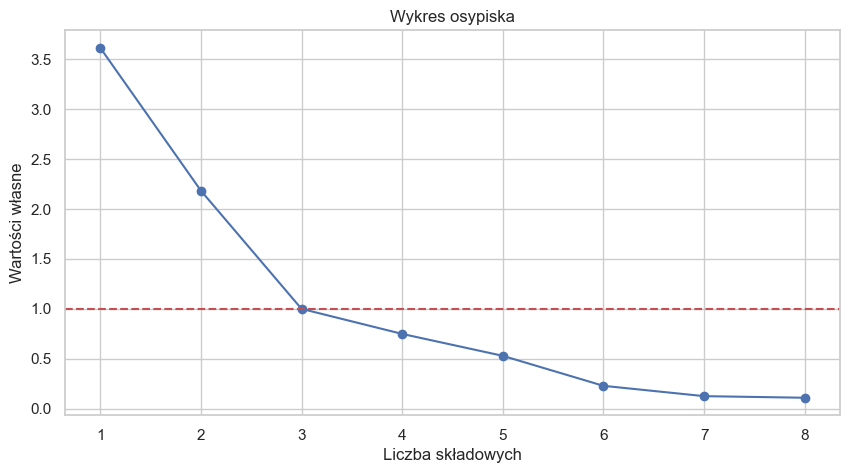

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Wykres osypiska')
plt.xlabel('Liczba składowych')
plt.ylabel('Wartości własne')

plt.show()

Wg. kryterium Kraisera należy przyjąc tylko 3 pierwsze składowe, ponieważ ich wartości własne są >= 1.

# 3. Analiza skupień

In [38]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster, cophenet
import plotly.figure_factory as ff
from scipy.spatial.distance import pdist, squareform

In [39]:
data_clustering = data.drop(columns=pca_variables)
len(data_clustering.columns)

8

In [40]:
data_clustering

,X5,X6,X7,X8,X9,X12,X13,X16
Województwo,,,,,,,,
Dolnośląskie,6.449861,5.418021,6.936,1.728935,2.346659,2.994874,0.804510,0.820433
Kujawsko-Pomorskie,3.816189,2.861646,5.651,2.547430,2.279801,2.346576,0.529036,1.364213
Lubelskie,3.851250,2.444685,6.564,1.408037,2.600207,2.345387,0.230382,1.007458
Lubuskie,5.063486,3.368893,4.951,1.227819,1.725035,4.938389,0.146785,1.319246
Łódzkie,9.223590,3.075226,6.223,1.006286,1.962466,2.141917,2.240502,0.768744
Małopolskie,6.489096,4.081775,9.273,1.203952,3.119197,2.855130,0.466232,0.765632
Mazowieckie,5.253235,5.413407,9.144,1.046656,2.539547,2.338399,0.937534,0.739190
Opolskie,4.617414,1.869104,5.015,1.602390,2.108408,2.668584,1.651276,0.866029
Podkarpackie,5.091249,2.180320,5.815,1.030714,2.876412,3.832214,0.104810,0.873135


In [41]:
data_clustering_names = {
"X5": "Liczba wypadków na 10 tyś ludności",
"X6": "Mieszkania oddane do użytkowania na 1 tyś ludności",
"X7": "Mediana cen mieszkan w tysiącach",
"X8": "Liczba imprez przypadających na 10 tyś mieszkańców",
"X9": "Liczba muzeów przypadająca na 100 tyś mieszkańców",
"X12": "Powierzchnia lasów przypadająca na 10 km^2 powierzchni",
"X13": "Emisja zanieczyszczeń gazowych na 1 tys km^2 ( w tysiącach)",
"X16": "Rodziny, którym przyznano świadczenia z powodu ubóstwa na 100 ludności"
}

df_data_clustering_names = pd.DataFrame(list(data_clustering_names.values()), index=data_clustering_names.keys(), columns=['Cecha'])
df_data_clustering_names

,Cecha
X5,Liczba wypadków na 10 tyś ludności
X6,Mieszkania oddane do użytkowania na 1 tyś ludn...
X7,Mediana cen mieszkan w tysiącach
X8,Liczba imprez przypadających na 10 tyś mieszka...
X9,Liczba muzeów przypadająca na 100 tyś mieszkańców
X12,Powierzchnia lasów przypadająca na 10 km^2 pow...
X13,Emisja zanieczyszczeń gazowych na 1 tys km^2 (...
X16,"Rodziny, którym przyznano świadczenia z powodu..."


### Odległości euklidesowe

In [42]:
new_index = list(range(1, 17))
distance_matrix = pdist(data_clustering, metric='euclidean')

square_distance_matrix = squareform(distance_matrix)

distance_df = pd.DataFrame(square_distance_matrix, index=new_index, columns=new_index)
distance_df_rounded = distance_df.round(2)
distance_df_rounded

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0.00,4.07,4.08,3.89,4.14,2.87,2.70,4.53,3.94,4.32,2.35,4.70,4.62,2.69,1.48,2.08
2,4.07,0.00,1.62,3.35,5.95,4.99,4.86,2.14,2.72,2.22,5.60,2.80,3.00,2.84,3.57,2.81
3,4.08,1.62,0.00,3.54,5.84,4.20,4.26,2.40,2.15,1.81,5.37,3.24,2.50,2.92,3.39,2.64
4,3.89,3.35,3.54,0.00,5.62,5.28,5.50,3.22,2.22,3.11,5.18,3.46,3.68,2.21,3.46,2.15
5,4.14,5.95,5.84,5.62,0.00,4.78,5.64,5.01,5.13,6.79,5.44,5.15,4.52,4.23,3.67,4.75
6,2.87,4.99,4.20,5.28,4.78,0.00,2.04,5.40,4.33,4.98,3.05,5.73,4.66,4.11,3.05,3.46
7,2.70,4.86,4.26,5.50,5.64,2.04,0.00,5.58,4.96,4.53,3.16,5.78,5.42,4.51,3.37,3.52
8,4.53,2.14,2.40,3.22,5.01,5.40,5.58,0.00,2.37,3.16,6.20,1.24,1.77,2.92,3.78,3.20
9,3.94,2.72,2.15,2.22,5.13,4.33,4.96,2.37,0.00,2.76,5.03,3.11,1.93,2.05,3.02,2.14
10,4.32,2.22,1.81,3.11,6.79,4.98,4.53,3.16,2.76,0.00,5.47,3.72,3.78,3.26,3.93,2.63


### Grupowanie metodą centroidalną

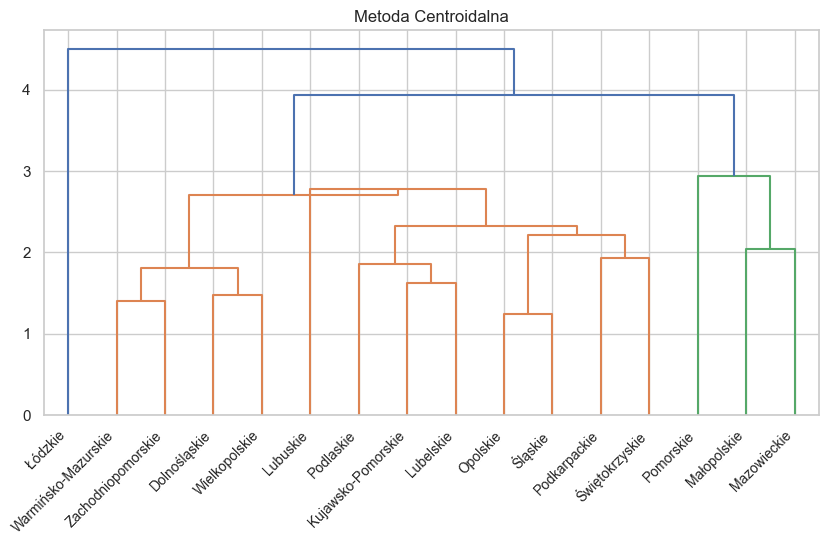

In [43]:
linkage_centroid = linkage(data_clustering, method='centroid', metric='euclidean')


plt.figure(figsize=(10, 5))
plt.title('Metoda Centroidalna')
dendrogram(linkage_centroid, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [44]:
linkage_centroid[:, 2]

array([1.24274165, 1.40709562, 1.48239701, 1.62049404, 1.80690366,
       1.85875573, 1.92874431, 2.04152143, 2.2127292 , 2.32053162,
       2.77411969, 2.70620355, 2.93587272, 3.9321297 , 4.50309565])

### Grupowanie metodą Warda

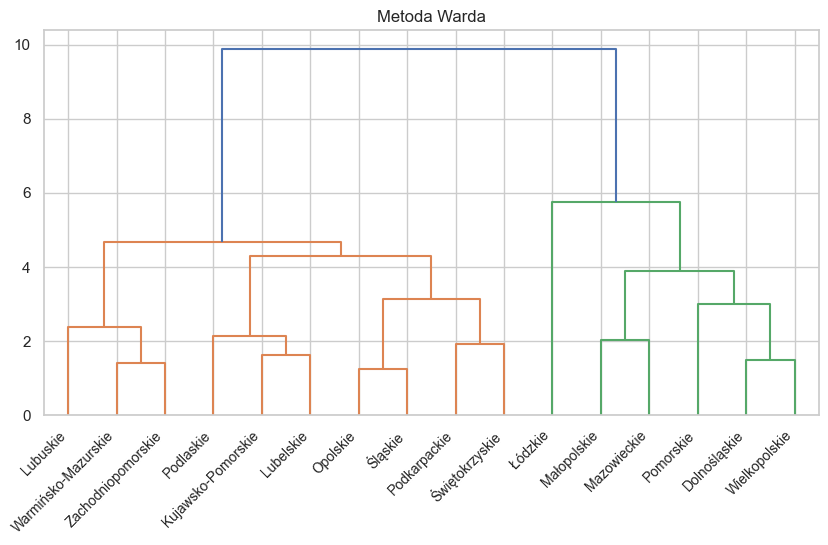

In [45]:
linkage_ward = linkage(data_clustering, method='ward', metric='euclidean')


plt.figure(figsize=(10, 5))
plt.title('Metoda Warda')
dendrogram(linkage_ward, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### Grupowanie metodą średniej grupowej

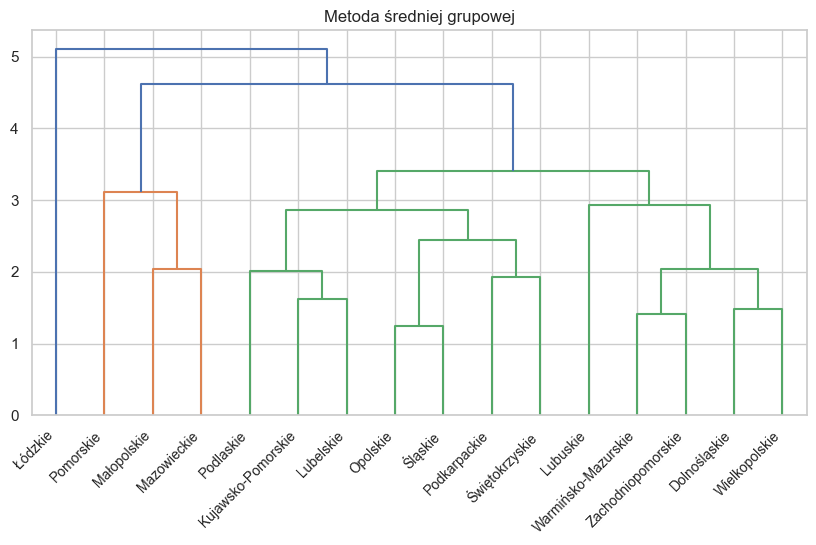

In [46]:
linkage_average = linkage(data_clustering, method='average', metric='euclidean')


plt.figure(figsize=(10, 5))
plt.title('Metoda średniej grupowej')
dendrogram(linkage_average, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### Grupowanie metodą najbliższego sąsiada

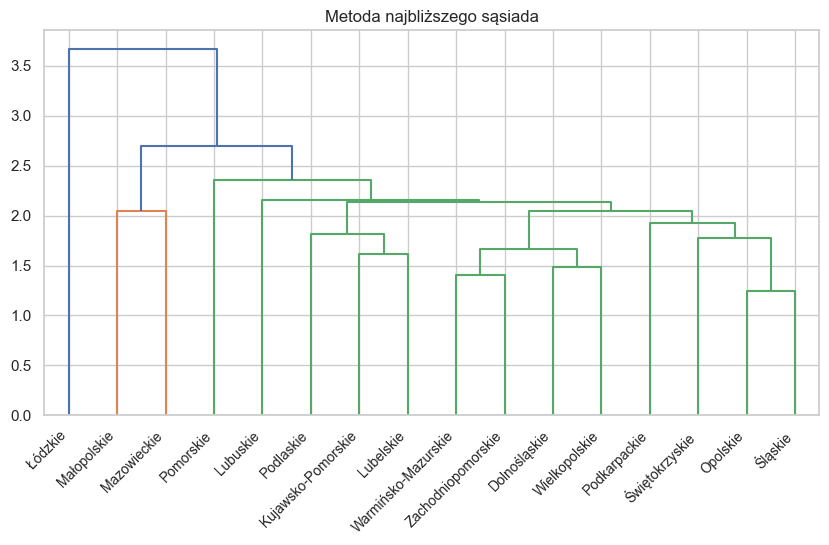

In [47]:
linkage_single= linkage(data_clustering, method='single', metric='euclidean')


plt.figure(figsize=(10, 5))
plt.title('Metoda najbliższego sąsiada')
dendrogram(linkage_single, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### Grupowanie metodą najdalszego sąsiada

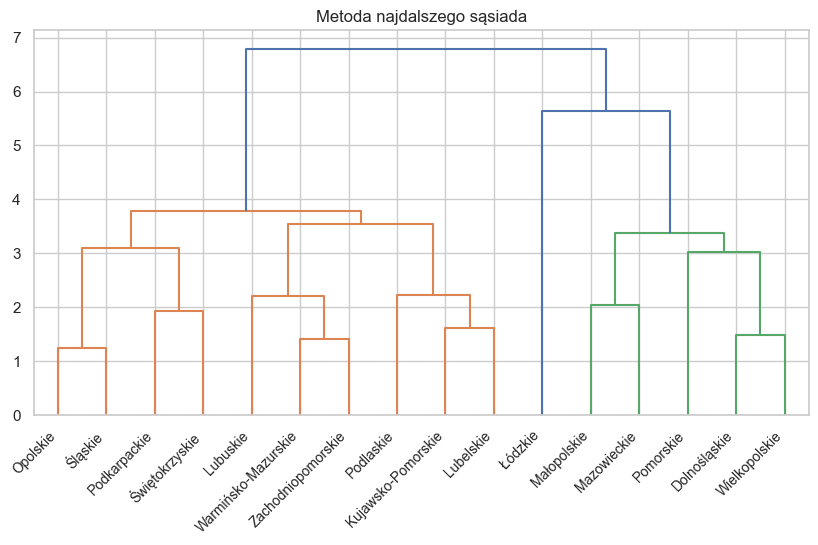

In [48]:
linkage_complete = linkage(data_clustering, method='complete', metric='euclidean')


plt.figure(figsize=(10, 5))
plt.title('Metoda najdalszego sąsiada')
dendrogram(linkage_complete, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

### Grupowanie metodą średniej ważonej

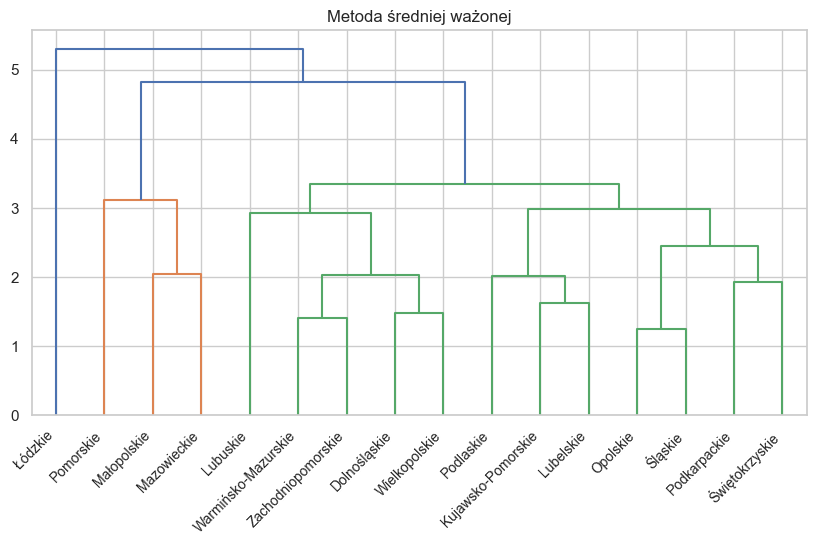

In [49]:
linkage_weighted = linkage(data_clustering, method='weighted', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.title('Metoda średniej ważonej')
dendrogram(linkage_weighted, labels=data_clustering.index)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

Obliczenie współczynnika korelacji kofenetycznej dla metod grupowania w celu ustalenia najlepszej metody:

In [50]:
kof_ward = cophenet(linkage_ward, pdist(data_clustering))
kof_average = cophenet(linkage_average, pdist(data_clustering))
kof_single = cophenet(linkage_single, pdist(data_clustering))
kof_complete = cophenet(linkage_complete, pdist(data_clustering))
kof_centroid = cophenet(linkage_centroid, pdist(data_clustering))
kof_weighted = cophenet(linkage_weighted, pdist(data_clustering))

print(f"Współczynnik kofenetyczny dla metody Warda: {round(kof_ward[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody średniej grupowej: {round(kof_average[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody najbliszego sąsiada: {round(kof_single[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody najdalszego sąsiada: {round(kof_complete[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody centroidalnej: {round(kof_centroid[0], 4)}")
print(f"Współczynnik kofenetyczny dla metody średniej ważonej: {round(kof_weighted[0], 4)}")

Współczynnik kofenetyczny dla metody Warda: 0.7247
Współczynnik kofenetyczny dla metody średniej grupowej: 0.7959
Współczynnik kofenetyczny dla metody najbliszego sąsiada: 0.6608
Współczynnik kofenetyczny dla metody najdalszego sąsiada: 0.7511
Współczynnik kofenetyczny dla metody centroidalnej: 0.7843
Współczynnik kofenetyczny dla metody średniej ważonej: 0.7935


W związku z powższym metoda średniej grupowej jest najtrafniejsza.

### Kryterium Mojeny

In [51]:
def mojena(linkage_method, metric):
    linkage_matrix = linkage(data_clustering, method=linkage_method, metric=metric)
    heights = linkage_matrix[:, 2] 
    heights_with_zero = np.insert(heights, 0, 0) # dodanie zera na początku zgodnie z tym co robiliśmy w R na zajęciach
    mean_height = np.mean(heights_with_zero)
    std_height = np.std(heights_with_zero, ddof=1) #ddof=1 to odchylenie dla próby n-1 (w domysle w pythonie jest dla populacji n)
    a = 0.7
    mojena_threshold = mean_height + a * std_height
    return mojena_threshold

mojena_ward = mojena('ward', 'euclidean')
mojena_average = mojena('average', 'euclidean')
mojena_single = mojena('single', 'euclidean')
mojena_complete = mojena('complete', 'euclidean')
mojena_centroid = mojena('centroid', 'euclidean')
mojena_weighted = mojena('weighted','euclidean')


print("Próg cięcia według kryterium Mojeny dla metody Warda:", mojena_ward)
print("Próg cięcia według kryterium Mojeny dla metody średniej grupowej:", mojena_average)
print("Próg cięcia według kryterium Mojeny dla metody najbliższego sąsiada:", mojena_single)
print("Próg cięcia według kryterium Mojeny dla metody najdalszego sąsiada:", mojena_complete)
print("Próg cięcia według kryterium Mojeny dla metody centroidalnej:", mojena_centroid)
print("Próg cięcia według kryterium Mojeny dla metody średniej ważonej:", mojena_weighted)

Próg cięcia według kryterium Mojeny dla metody Warda: 4.6972348613503705
Próg cięcia według kryterium Mojeny dla metody średniej grupowej: 3.2852072368771377
Próg cięcia według kryterium Mojeny dla metody najbliższego sąsiada: 2.4111597245874825
Próg cięcia według kryterium Mojeny dla metody najdalszego sąsiada: 3.9019507870691212
Próg cięcia według kryterium Mojeny dla metody centroidalnej: 2.9194316596053236
Próg cięcia według kryterium Mojeny dla metody średniej ważonej: 3.348302227163692


### Linia przecięcia dendogramów na podstawie kryterium Mojeny

Metoda średniej grupowej

In [52]:
clusters_average = fcluster(linkage_average, mojena_average, criterion='distance')

df_clusters_average = data_clustering.copy()
df_clusters_average['clusters'] = clusters_average
df_clusters_average

,X5,X6,X7,X8,X9,X12,X13,X16,clusters
Województwo,,,,,,,,,
Dolnośląskie,6.449861,5.418021,6.936,1.728935,2.346659,2.994874,0.804510,0.820433,3
Kujawsko-Pomorskie,3.816189,2.861646,5.651,2.547430,2.279801,2.346576,0.529036,1.364213,2
Lubelskie,3.851250,2.444685,6.564,1.408037,2.600207,2.345387,0.230382,1.007458,2
Lubuskie,5.063486,3.368893,4.951,1.227819,1.725035,4.938389,0.146785,1.319246,3
Łódzkie,9.223590,3.075226,6.223,1.006286,1.962466,2.141917,2.240502,0.768744,4
Małopolskie,6.489096,4.081775,9.273,1.203952,3.119197,2.855130,0.466232,0.765632,1
Mazowieckie,5.253235,5.413407,9.144,1.046656,2.539547,2.338399,0.937534,0.739190,1
Opolskie,4.617414,1.869104,5.015,1.602390,2.108408,2.668584,1.651276,0.866029,2
Podkarpackie,5.091249,2.180320,5.815,1.030714,2.876412,3.832214,0.104810,0.873135,2


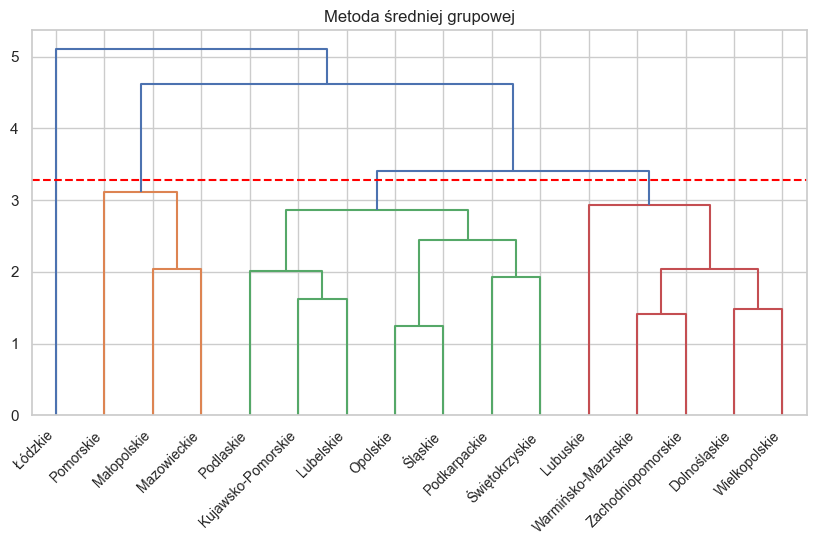

In [53]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_average, color_threshold=mojena_average, labels=data_clustering.index)
plt.axhline(y=mojena_average, color='red', linestyle='dashed')
plt.title('Metoda średniej grupowej')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

W związku z kryterium mojeny oraz wizualną reprezentacją poprzez dendogramy, widać, ze wojewodztwa łącza sie w 3 klastry w metodzie średnich grupowych. W związu z tym przyjmujemy 3 klastry

### Wykres średnich dla klastrów

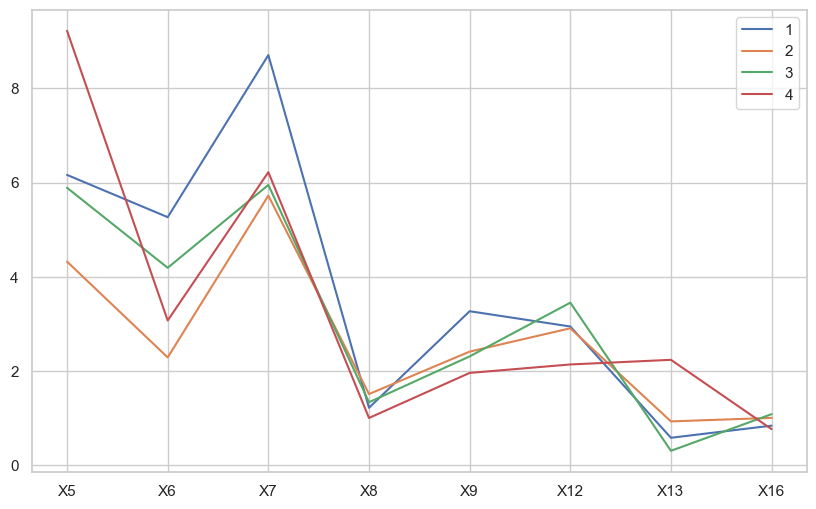

In [54]:
agg = df_clusters_average.groupby(['clusters']).mean()

plt.figure(figsize=(10, 6))
for index in agg.index:
    row = agg.loc[index, :]
    plt.plot(row, label=index)
    plt.xticks(range(len(data_clustering.columns)), labels=list(data_clustering.columns))

plt.legend()

### Mapa rozmieszczenia klastrów

In [55]:
import geopandas as gpd

In [56]:
path = r'C:\Users\Piotr\iCloudDrive\Python\PRG_jednostki_administracyjne_2022\A01_Granice_wojewodztw.shp'
woj = gpd.read_file(path)

In [57]:
woj = woj[['JPT_KOD_JE', "geometry"]]
woj.head()

,JPT_KOD_JE,geometry
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605..."
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162..."
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322..."
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375..."
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033..."


In [58]:
woj = woj.rename(columns={'JPT_KOD_JE': 'TERYT'})
woj

,TERYT,geometry
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605..."
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162..."
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322..."
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375..."
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033..."
5,24,"MULTIPOLYGON (((19.83803 50.59001, 19.83754 50..."
6,04,"POLYGON ((18.14065 52.50609, 18.14011 52.50601..."
7,16,"POLYGON ((17.74135 50.28711, 17.74138 50.28771..."
8,32,"POLYGON ((14.24969 53.92403, 14.27264 53.92417..."
9,20,"POLYGON ((23.50472 54.00966, 23.50232 54.00845..."


In [59]:
teryt_to_wojewodztwo = {
    '02': 'Dolnośląskie',
    '04': 'Kujawsko-Pomorskie',
    '06': 'Lubelskie',
    '08': 'Lubuskie',
    '10': 'Łódzkie',
    '12': 'Małopolskie',
    '14': 'Mazowieckie',
    '16': 'Opolskie',
    '18': 'Podkarpackie',
    '20': 'Podlaskie',
    '22': 'Pomorskie',
    '24': 'Śląskie',
    '26': 'Świętokrzyskie',
    '28': 'Warmińsko-Mazurskie',
    '30': 'Wielkopolskie',
    '32': 'Zachodniopomorskie'
}
woj['nazwa'] = woj['TERYT'].map(teryt_to_wojewodztwo)
woj

,TERYT,geometry,nazwa
0,30,"POLYGON ((18.14065 52.50609, 18.14115 52.50605...",Wielkopolskie
1,10,"POLYGON ((20.42486 51.61167, 20.42489 51.61162...",Łódzkie
2,28,"POLYGON ((20.29152 54.40384, 20.30025 54.40322...",Warmińsko-Mazurskie
3,12,"POLYGON ((20.80878 49.35366, 20.80898 49.35375...",Małopolskie
4,26,"POLYGON ((19.83803 50.59001, 19.83874 50.59033...",Świętokrzyskie
5,24,"MULTIPOLYGON (((19.83803 50.59001, 19.83754 50...",Śląskie
6,04,"POLYGON ((18.14065 52.50609, 18.14011 52.50601...",Kujawsko-Pomorskie
7,16,"POLYGON ((17.74135 50.28711, 17.74138 50.28771...",Opolskie
8,32,"POLYGON ((14.24969 53.92403, 14.27264 53.92417...",Zachodniopomorskie
9,20,"POLYGON ((23.50472 54.00966, 23.50232 54.00845...",Podlaskie


<Axes: >

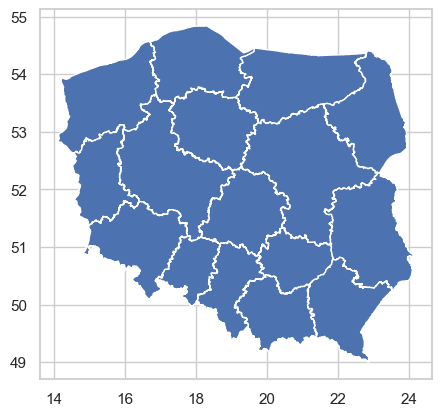

In [60]:
woj.plot()

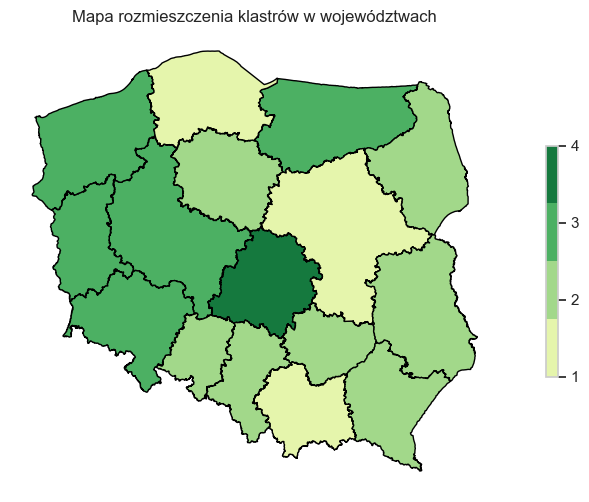

In [61]:
df_clusters_average = df_clusters_average.reset_index()
merged = woj.merge(df_clusters_average, left_on='nazwa', right_on='Województwo')

fig, ax = plt.subplots(1, figsize=(12, 6))
cmap = ListedColormap(sns.color_palette("YlGn", n_colors=merged['clusters'].nunique()))
plot = merged.plot(column='clusters', ax=ax, legend=False, cmap=cmap, edgecolor='black')
plt.axis('off')
plt.title('Mapa rozmieszczenia klastrów w województwach')


unique_clusters = sorted(merged['clusters'].unique())
cbar = plot.get_figure().colorbar(plot.collections[0], ax=ax, ticks=unique_clusters, shrink=0.5)
cbar.ax.set_yticklabels(unique_clusters)

plt.show()

# 4. Porządkowanie liniowe

### Określenie stymulantów i destymulantów

* "X5": "Liczba wypadków na 10 tyś ludności", D
* "X6": "Mieszkania oddane do użytkowania na 1 tyś ludności", S
* "X7": "Mediana cen mieszkan w tysiącach", D
* "X8": "Liczba imprez przypadających na 10 tyś mieszkańców", S
* "X9": "Liczba muzeów przypadająca na 100 tyś mieszkańców", S
* "X12": "Powierzchnia lasów przypadająca na 10 km^2 powierzchni", S
* "X13": "Emisja zanieczyszczeń gazowych na 1 tys km^2 ( w tysiącach)", D
* "X16": "Rodziny, którym przyznano świadczenia z powodu ubóstwa na 100 ludności", D

In [62]:
data_clustering

,X5,X6,X7,X8,X9,X12,X13,X16
Województwo,,,,,,,,
Dolnośląskie,6.449861,5.418021,6.936,1.728935,2.346659,2.994874,0.804510,0.820433
Kujawsko-Pomorskie,3.816189,2.861646,5.651,2.547430,2.279801,2.346576,0.529036,1.364213
Lubelskie,3.851250,2.444685,6.564,1.408037,2.600207,2.345387,0.230382,1.007458
Lubuskie,5.063486,3.368893,4.951,1.227819,1.725035,4.938389,0.146785,1.319246
Łódzkie,9.223590,3.075226,6.223,1.006286,1.962466,2.141917,2.240502,0.768744
Małopolskie,6.489096,4.081775,9.273,1.203952,3.119197,2.855130,0.466232,0.765632
Mazowieckie,5.253235,5.413407,9.144,1.046656,2.539547,2.338399,0.937534,0.739190
Opolskie,4.617414,1.869104,5.015,1.602390,2.108408,2.668584,1.651276,0.866029
Podkarpackie,5.091249,2.180320,5.815,1.030714,2.876412,3.832214,0.104810,0.873135


In [63]:
# stymulanty dla data_clustering
s = [False, True, False, True, True, True, False, False]

In [64]:
data = data_clustering

In [65]:
wsp_zmienn = (data.std(ddof=0) / data.mean()) * 100
sum_wsp_zmienn = wsp_zmienn.sum()

### Hellwig (klasyczny)

In [66]:
df_scaled = (data - data.mean()) / data.std(ddof=0)

# utworzenie wzorca i antywzorca z uwzględnieniem stymulantów i destymulantów (if s = True: data.max(), else: data.min()
wzorzec = np.where(s, df_scaled.max(), df_scaled.min())
antywzorzec = np.where(s, df_scaled.min(), df_scaled.max())

# obliczenie odległości i miary podobieństwa na standaryzowanych danych
d0 = np.sqrt(((wzorzec - antywzorzec)**2).sum())
y_df = (df_scaled - wzorzec)**2

di0 = np.sqrt(y_df.sum(axis=1))
mi = 1 - (di0 / d0)


mi = mi.sort_values(ascending=False)
hellwig = pd.DataFrame(mi, columns=['Miara']).reset_index() 
hellwig.set_index('Województwo', inplace=True)
hellwig.round(4)

,Miara
Województwo,
Pomorskie,0.5370
Dolnośląskie,0.4781
Zachodniopomorskie,0.4656
Podkarpackie,0.4624
Wielkopolskie,0.4321
Kujawsko-Pomorskie,0.4214
Lubelskie,0.4101
Lubuskie,0.4010
Małopolskie,0.3901


### Hellwig z wagami współczynnika zmienności

In [67]:
wsp_zmienn = (data.std(ddof=0) / data.mean()) * 100
sum_wsp_zmienn = wsp_zmienn.sum()
wagi = wsp_zmienn / sum_wsp_zmienn

# wazenie danych
data_w = ((data - data.mean()) / data.std(ddof=0)) * wagi
data_w

# wzorce po przewazneiu
wzorzec = np.where(s, data_w.max(), data_w.min())
antywzorzec = np.where(s, data_w.min(), data_w.max())

# obliczenie odległości miedzy wzrocem i antywzorcem
d0 = np.sqrt(((wzorzec - antywzorzec)**2).sum())
y_df = (data_w - wzorzec)**2

di0 = np.sqrt(y_df.sum(axis=1))
mi = 1 - (di0 / d0)

#############  zmienna agregatowa
di0_2 = di0.mean()+(2*di0.std(ddof=0))
qi = 1-(di0/di0_2)


mi = mi.sort_values(ascending=False)
hellwig_wght = pd.DataFrame(mi , columns=['Miara']).reset_index() 
hellwig_wght.set_index('Województwo', inplace=True)
hellwig_wght.round(4)

,Miara
Województwo,
Pomorskie,0.6941
Zachodniopomorskie,0.6408
Wielkopolskie,0.6295
Dolnośląskie,0.6188
Małopolskie,0.5971
Lubuskie,0.5959
Kujawsko-Pomorskie,0.5956
Podkarpackie,0.5936
Lubelskie,0.5900


### Metoda TOPSIS

In [68]:
# przekształcenie ilorazowe
sqrt_sums = np.sqrt((data ** 2).sum(axis=0))
transf = data / sqrt_sums

# wzorce po przekształceniu ilorazowym
wzorzec = np.where(s, transf.max(), transf.min())
antywzorzec = np.where(s, transf.min(), transf.max())

# odleglosci obiektow od wzorca/antywzorca
di0plus = np.sqrt(((transf - wzorzec)**2).sum(axis=1))
di0minus = np.sqrt(((transf - antywzorzec)**2).sum(axis=1))

# qi

qi = di0minus/(di0minus+di0plus)
qi = qi.sort_values(ascending=False)


topsis = pd.DataFrame(qi, columns=['Miara']).reset_index() 
topsis.set_index('Województwo', inplace=True)
topsis.round(4)

,Miara
Województwo,
Pomorskie,0.6890
Zachodniopomorskie,0.6304
Wielkopolskie,0.6243
Lubuskie,0.6151
Podkarpackie,0.6121
Dolnośląskie,0.6102
Kujawsko-Pomorskie,0.6070
Podlaskie,0.6024
Warmińsko-Mazurskie,0.5999


### Metoda sum standaryzowanych

In [69]:
df = data.copy()

transf = np.where(s, (df - df.mean()) / df.std(ddof=0), (df.mean() - df) / df.std(ddof=0))
transf_df = pd.DataFrame(transf, columns=df.columns, index=df.index)

summs = transf_df.sum(axis=1)
wi = summs/len(transf_df.columns)
wi2 = wi-wi.min()
wt = wi2/wi2.max()
wt = wt.sort_values(ascending=False)


wt_df = pd.DataFrame(wt, columns=['Miara']).reset_index() 
wt_df.set_index('Województwo', inplace=True)
wt_df.round(4)

,Miara
Województwo,
Pomorskie,1.0000
Podkarpackie,0.7892
Lubuskie,0.7762
Kujawsko-Pomorskie,0.7603
Dolnośląskie,0.7388
Zachodniopomorskie,0.7236
Wielkopolskie,0.6981
Lubelskie,0.6223
Śląskie,0.6150


### Metoda dystansów

In [70]:
df = data.copy()

transf = np.where(s, df / df.max(), df.min() / df)
transf_df = pd.DataFrame(transf, index=df.index, columns=df.columns)
wi = transf_df.mean(axis=1)
wi = wi.sort_values(ascending=False)

dist = pd.DataFrame(wi, columns=['Miara'])
dist.round(4)

,Miara
Województwo,
Pomorskie,0.6473
Warmińsko-Mazurskie,0.6416
Podlaskie,0.6332
Podkarpackie,0.6258
Lubuskie,0.6177
Śląskie,0.6024
Dolnośląskie,0.5917
Wielkopolskie,0.5893
Kujawsko-Pomorskie,0.5884


### Ranking na podstawie średnich wyników z wszystkich metod porządkowania liniowego

In [71]:
df1 = hellwig.reindex(data.index)
df2 = hellwig_wght.reindex(data.index)
df3 = topsis.reindex(data.index)
df4 = wt_df.reindex(data.index)
df5 = dist.reindex(data.index)

rank = [df.rank().reindex(data.index) for df in [df1, df2, df3, df4, df5]]

ranked = sum(rank) / len(rank)
ranked = ranked.sort_values(by='Miara', ascending=False)
ranked

,Miara
Województwo,
Pomorskie,16.0
Podkarpackie,12.4
Zachodniopomorskie,12.4
Dolnośląskie,12.2
Lubuskie,11.8
Wielkopolskie,11.8
Kujawsko-Pomorskie,10.4
Warmińsko-Mazurskie,8.6
Lubelskie,8.0


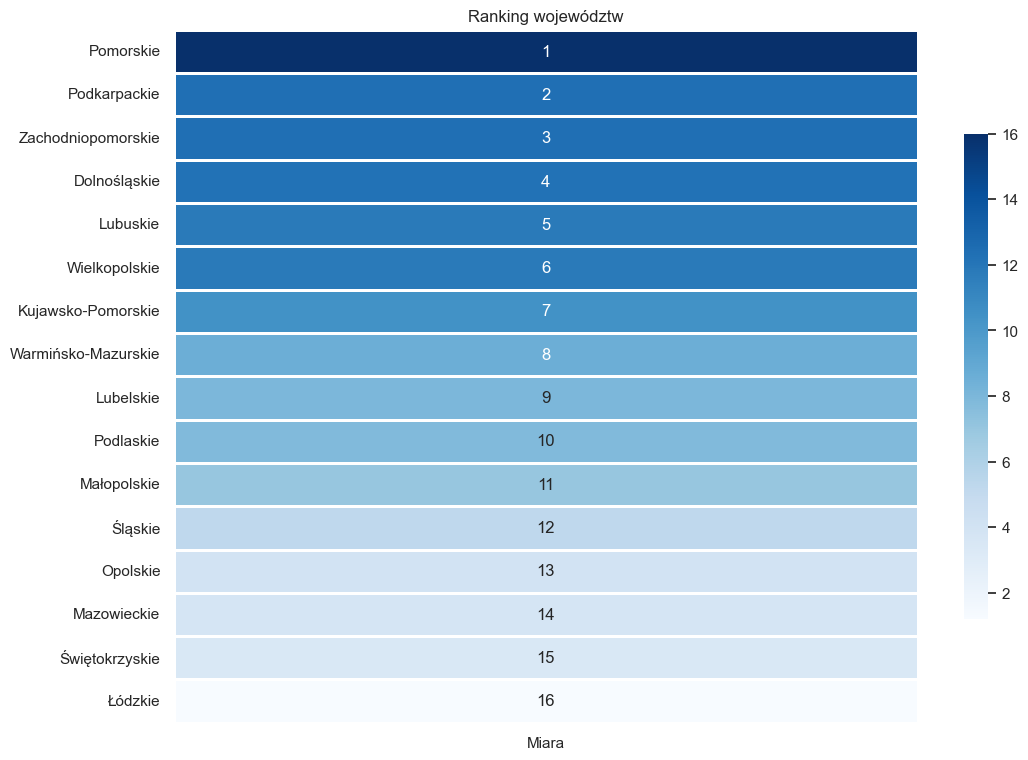

In [73]:
annot = np.arange(1, len(ranked) + 1).reshape(-1, 1) # indeksy rankingu

plt.figure(figsize=(12, 9))
sns.heatmap(ranked, cmap='Blues', annot=annot, linewidths=.9, cbar_kws={"shrink": .7})
plt.xlabel('')
plt.ylabel('')
plt.title('Ranking województw')
plt.show()

W powyższym rankingu przedstawiono uśrednione pozycje województw zastosowanych metod porządkowania liniowego, tym samym ułatwiając identyfikację tych, które średnio zajmowały najwyższe oraz najniższe miejsca. Najwyższa jakość życia można zaobserwować kolejno w województwach: Pomorskim, Podkarpackim i Zachodniopomorskim. Z kolei najniższą jakość życia odnotowano w województwach: Mazowieckim, Świętokrzyskim oraz Łódzkim.